In [12]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm  
import matplotlib.pyplot as plt

In [2]:
PATH_DF_CSV = '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train.csv'
PATH_OF_IMAGE = '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/'

In [14]:
def dataframe():
    df = pd.read_csv(PATH_DF_CSV)
    df.rename(columns={'image': 'id_code', 'level': 'diagnosis'}, inplace=True)
    return df

def create_paths():
    df = dataframe()
    x = df['id_code']
    paths = []
    for i in x:
        path = PATH_OF_IMAGE+f'{i}'
        paths.append(path)
    return paths

def load_X(subset=None):
    paths = create_paths()
    imgs = []
    for path in paths[:subset]:
        img = cv2.imread(path)
        imgs.append(np.array(img))
    X = np.array(imgs)
    return X

def load_y():
    df = dataframe()
    y = df['diagnosis']
    y = to_categorical(y, num_classes = 5)
    return y

In [4]:
df = dataframe()

In [6]:
df.head()

,id_code,diagnosis
0,000c1434d8d7.jpg,2
1,001639a390f0.jpg,4
2,0024cdab0c1e.jpg,1
3,002c21358ce6.jpg,0
4,005b95c28852.jpg,0


In [7]:
paths = create_paths()

In [8]:
paths

['/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/000c1434d8d7.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/001639a390f0.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/0024cdab0c1e.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/002c21358ce6.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/005b95c28852.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/0083ee8054ee.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/0097f532ac9f.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/00a8624548a9.jpg',
 '/Users/jade/code/lucieluneau/blindness_detection/raw_data/kaggle_clean_dataset/train_images/00

In [11]:
%%time
X = load_data()

100%|██████████| 3662/3662 [00:46<00:00, 78.62it/s] 


CPU times: user 28.2 s, sys: 10.6 s, total: 38.8 s
Wall time: 1min


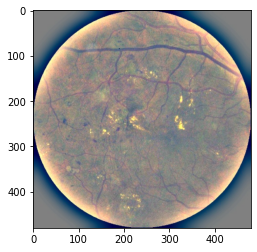

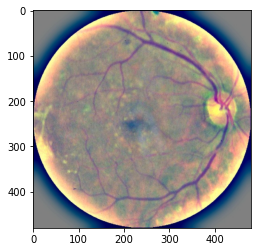

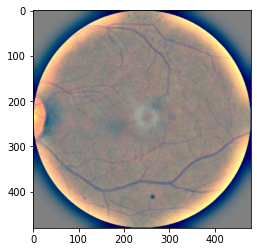

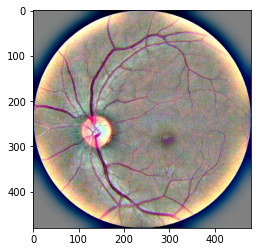

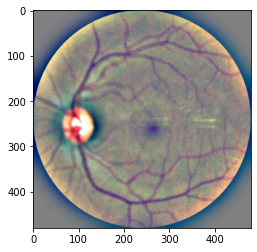

In [13]:
for image in range(5):
    plt.imshow(X[image])
    plt.show()

In [23]:
y = load_y()

In [24]:
y

0       2
1       4
2       1
3       0
4       0
5       4
6       0
7       2
8       2
9       1
10      0
11      2
12      0
13      3
14      1
15      0
16      2
17      0
18      0
19      2
20      2
21      0
22      1
23      2
24      0
25      2
26      0
27      0
28      0
29      0
       ..
3632    0
3633    0
3634    3
3635    1
3636    2
3637    0
3638    0
3639    1
3640    1
3641    0
3642    1
3643    0
3644    0
3645    0
3646    2
3647    0
3648    2
3649    0
3650    0
3651    0
3652    2
3653    0
3654    0
3655    2
3656    4
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [17]:
X.shape

(3662, 480, 480, 3)

In [19]:
from tensorflow.keras.utils import to_categorical

In [25]:
y = to_categorical(y, num_classes = 5)

In [26]:
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [27]:
y.shape

(3662, 5)

In [30]:
from sklearn.model_selection import train_test_split
def split(x, y, test_size=0.15, random_state=8):
    train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=test_size,
                                                      stratify=y, random_state=random_state)
    return train_x, valid_x, train_y, valid_y

In [31]:
train_x, valid_x, train_y, valid_y = split(X, y, test_size=0.15, random_state=8)

In [32]:
train_x.shape

(3112, 480, 480, 3)

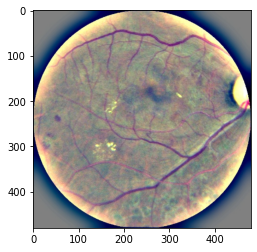

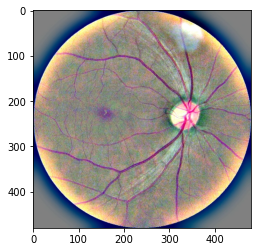

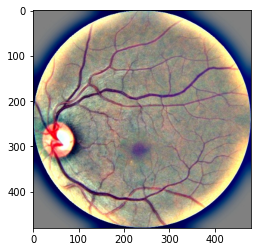

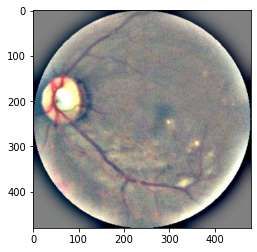

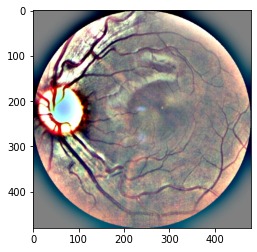

In [33]:
for image in range(5):
    plt.imshow(train_x[image])
    plt.show()